Dans ce notebook :
- calcul des matrices de connectivité
- sélection de paramètres Ridge (vecteur de features des sommets du graphe)
- calcul du graphe (poids des arêtes)
- affichage de la matrice d'adjacence du graphe


In [1]:
pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 31.3 MB/s eta 0:00:00


In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from nilearn import datasets, connectome
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import FunctionTransformer
import scipy.io as sio

# Load ABIDE data
abide_data = datasets.fetch_abide_pcp(pipeline='cpac', derivatives='rois_ho')
phenotype_data = abide_data.phenotypic

# Subject list
subject_IDs = [subject['SUB_ID'] for subject in phenotype_data]


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


In [3]:
# Extraction of phenotypic information
def get_subject_score(subject_list, score):
    scores_dict = {}
    for row in phenotype_data:
        if row['SUB_ID'] in subject_list:
            scores_dict[row['SUB_ID']] = row[score]
    return scores_dict

# Distance matrix (correlation) between pairs of dataset
def calculate_distance(x_data):
    distv = distance.pdist(x_data, metric='correlation')
    dist = distance.squareform(distv)
    return dist

# Calcul of the affinity matrix based on distance
def calculate_affinity_graph(dist):
    sigma = np.mean(dist)
    sparse_graph = np.exp(- dist ** 2 / (2 * sigma ** 2))
    return sparse_graph

# Function to create the final graph
def create_final_graph(graph_feat, sparse_graph):
    final_graph = graph_feat * sparse_graph
    return final_graph

# Create affinity graph based on phenotypic scores
def create_affinity_graph_from_scores(scores, subject_list):
    num_nodes = len(subject_list)
    graph = np.zeros((num_nodes, num_nodes))

    for l in scores:
        label_dict = get_subject_score(subject_list, l)

        # for quantitative phenotypic scores (as SEX or SITE_ID)
        if l in ['SEX', 'SITE_ID']:
            for k in range(num_nodes):
                for j in range(k + 1, num_nodes):
                    if label_dict[subject_list[k]] == label_dict[subject_list[j]]:
                        graph[k, j] += 1
                        graph[j, k] += 1

    return graph

In [4]:
# Calcul of connectivity for a subject
def subject_connectivity(timeseries, subject, atlas_name, kind, save=False, save_path=None):
    """
    Calcule connectivity metrix for one subject

    timeseries   : time series for the subject (time x region)
    subject      : subject ID
    atlas_name   : atlas used (e.g. 'ho')
    kind         : kind of connectivity ('correlation', 'partial correlation', etc.)
    save         : if True, save the connectivity matrix in a fine
    save_path    : path if 'save' is True

    returns:
    connectivity : connectivity matrix (region x region)
    """
    print(f"Calcul of the {kind} matrix for subject {subject}")

    # Connectivity calcul from time series
    if kind in ['correlation', 'partial correlation', 'tangent']:
        conn_measure = connectome.ConnectivityMeasure(kind=kind)
        connectivity = conn_measure.fit_transform([timeseries])[0]
    else:
        raise ValueError(f"Type de connectivité non supporté : {kind}")

    # Save the matrix
    if save:
        if save_path is None:
            print("no path")
        subject_file = f"{save_path}/{subject}_{atlas_name}_{kind.replace(' ', '_')}.mat"
        sio.savemat(subject_file, {'connectivity': connectivity})

    return connectivity

# Function to get connictivity networks
def get_networks(subject_list, kind, atlas_name="ho"):
    """
    subject_list : list of subject IDs
    kind         : kind of connectivity ('correlation', 'partial correlation', 'tangent')
    atlas_name   : name of atlas uned (e.g. 'ho' or 'aal')

    return:
    matrix       : matrix caracteristic of connectivity networks (subject x caracteristics)
    """
    all_networks = []

    # Get time series for each subject
    timeseries = abide_data.rois_ho  # contain the time series for each subject (timepoints x regions)

    for i, subject in enumerate(subject_list):
        # Connectivity matrix for each subject
        connectivity_matrix = subject_connectivity(timeseries[i], subject, atlas_name, kind, save=False)

        if connectivity_matrix.shape[0] != connectivity_matrix.shape[1]:
            raise ValueError(f"Connectivity matrix for subject {subject} is not square !")

        # Fisher transformation (arctanh) to normalize correlations
        norm_matrix = np.arctanh(connectivity_matrix)

        # Extraction of upper part (above diagonal)
        idx = np.triu_indices_from(connectivity_matrix, 1)
        vectorized_matrix = norm_matrix[idx]

        all_networks.append(vectorized_matrix)

    # Stack vectors to create the caracteristics matrix
    feature_matrix = np.vstack(all_networks)

    return feature_matrix


def feature_selection(matrix, labels, train_ind, fnum):
    # feature selection with Ridge classifier

    estimator = RidgeClassifier()

    # RFE with fnum features to select
    selector = RFE(estimator, n_features_to_select=fnum, step=100, verbose=1)

    # Selecttion of characteristic on train data
    featureX = matrix[train_ind, :]
    featureY = labels[train_ind]

    # Training of caracteristif selector
    selector = selector.fit(featureX, featureY.ravel())

    # Application of selector to matrix
    x_data = selector.transform(matrix)

    print("Number of selected caracteristics: %d" % x_data.shape[1])

    return x_data

In [5]:
# ----- Step 1 : get label and acquisition site for each subject -----
num_nodes = len(subject_IDs)
y_data = np.zeros((num_nodes, 2))  # 2 classes (prediction 0 or 1)
y = np.zeros(num_nodes)
site = np.zeros(num_nodes)

# Get scores for sites and label
sites = get_subject_score(subject_IDs, 'SITE_ID')
labels = get_subject_score(subject_IDs, 'DX_GROUP')

unique = list(set(sites.values()))  # unique sites
for i in range(num_nodes):
    y_data[i, int(labels[subject_IDs[i]])-1] = 1
    y[i] = int(labels[subject_IDs[i]])
    site[i] = unique.index(sites[subject_IDs[i]])

# ----- Step 2 : Create affinity graph based on SEX and SITE_ID (phenotypic info) -----
graph_feat = create_affinity_graph_from_scores(['SEX', 'SITE_ID'], subject_IDs)


# ----- Step 4 : Ridge feature selection -----
features = get_networks(subject_IDs, kind='correlation', atlas_name="ho")
x_data = feature_selection(features, y, np.arange(num_nodes), fnum=100)

# ----- Step 5 : Get distances (similary between subjects, no phenotypic info) after feature selection -----
dist = calculate_distance(x_data)
sparse_graph = calculate_affinity_graph(dist)

# ----- Step 6 : Get the final graph combining similary between subject info and phenotypic info -----
final_graph = create_final_graph(graph_feat, sparse_graph)

Calcul of the correlation matrix for subject 50003
Calcul of the correlation matrix for subject 50004
Calcul of the correlation matrix for subject 50005
Calcul of the correlation matrix for subject 50006
Calcul of the correlation matrix for subject 50007
Calcul of the correlation matrix for subject 50008
Calcul of the correlation matrix for subject 50010
Calcul of the correlation matrix for subject 50011
Calcul of the correlation matrix for subject 50012
Calcul of the correlation matrix for subject 50013
Calcul of the correlation matrix for subject 50014
Calcul of the correlation matrix for subject 50015
Calcul of the correlation matrix for subject 50016
Calcul of the correlation matrix for subject 50020
Calcul of the correlation matrix for subject 50022
Calcul of the correlation matrix for subject 50023
Calcul of the correlation matrix for subject 50024
Calcul of the correlation matrix for subject 50025
Calcul of the correlation matrix for subject 50026
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim


Calcul of the correlation matrix for subject 50053
Calcul of the correlation matrix for subject 50054
Calcul of the correlation matrix for subject 50056
Calcul of the correlation matrix for subject 50057
Calcul of the correlation matrix for subject 50059
Calcul of the correlation matrix for subject 50060
Calcul of the correlation matrix for subject 50102
Calcul of the correlation matrix for subject 50103
Calcul of the correlation matrix for subject 50104
Calcul of the correlation matrix for subject 50105
Calcul of the correlation matrix for subject 50106
Calcul of the correlation matrix for subject 50107
Calcul of the correlation matrix for subject 50109
Calcul of the correlation matrix for subject 50111
Calcul of the correlation matrix for subject 50112
Calcul of the correlation matrix for subject 50113
Calcul of the correlation matrix for subject 50114
Calcul of the correlation matrix for subject 50115
Calcul of the correlation matrix for subject 50116
Calcul of the correlation matr

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50159
Calcul of the correlation matrix for subject 50160
Calcul of the correlation matrix for subject 50161
Calcul of the correlation matrix for subject 50162
Calcul of the correlation matrix for subject 50163
Calcul of the correlation matrix for subject 50164
Calcul of the correlation matrix for subject 50167
Calcul of the correlation matrix for subject 50168
Calcul of the correlation matrix for subject 50169
Calcul of the correlation matrix for subject 50170
Calcul of the correlation matrix for subject 50171
Calcul of the correlation matrix for subject 50182
Calcul of the correlation matrix for subject 50183
Calcul of the correlation matrix for subject 50184
Calcul of the correlation matrix for subject 50186
Calcul of the correlation matrix for subject 50187
Calcul of the correlation matrix for subject 50188
Calcul of the correlation matrix for subject 50189
Calcul of the correlation matrix for subject 50190
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50249
Calcul of the correlation matrix for subject 50250
Calcul of the correlation matrix for subject 50251
Calcul of the correlation matrix for subject 50252
Calcul of the correlation matrix for subject 50253
Calcul of the correlation matrix for subject 50254
Calcul of the correlation matrix for subject 50255
Calcul of the correlation matrix for subject 50257
Calcul of the correlation matrix for subject 50259
Calcul of the correlation matrix for subject 50260
Calcul of the correlation matrix for subject 50261
Calcul of the correlation matrix for subject 50262
Calcul of the correlation matrix for subject 50263
Calcul of the correlation matrix for subject 50264
Calcul of the correlation matrix for subject 50265
Calcul of the correlation matrix for subject 50266
Calcul of the correlation matrix for subject 50267
Calcul of the correlation matrix for subject 50268
Calcul of the correlation matrix for subject 50269
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50308
Calcul of the correlation matrix for subject 50310
Calcul of the correlation matrix for subject 50312
Calcul of the correlation matrix for subject 50314
Calcul of the correlation matrix for subject 50315
Calcul of the correlation matrix for subject 50318
Calcul of the correlation matrix for subject 50319
Calcul of the correlation matrix for subject 50320
Calcul of the correlation matrix for subject 50321
Calcul of the correlation matrix for subject 50324
Calcul of the correlation matrix for subject 50325
Calcul of the correlation matrix for subject 50327
Calcul of the correlation matrix for subject 50329
Calcul of the correlation matrix for subject 50330
Calcul of the correlation matrix for subject 50331
Calcul of the correlation matrix for subject 50332
Calcul of the correlation matrix for subject 50333
Calcul of the correlation matrix for subject 50334
Calcul of the correlation matrix for subject 50335
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50360
Calcul of the correlation matrix for subject 50361
Calcul of the correlation matrix for subject 50362
Calcul of the correlation matrix for subject 50363
Calcul of the correlation matrix for subject 50364
Calcul of the correlation matrix for subject 50365
Calcul of the correlation matrix for subject 50366
Calcul of the correlation matrix for subject 50367
Calcul of the correlation matrix for subject 50368
Calcul of the correlation matrix for subject 50369
Calcul of the correlation matrix for subject 50370
Calcul of the correlation matrix for subject 50372
Calcul of the correlation matrix for subject 50373
Calcul of the correlation matrix for subject 50374
Calcul of the correlation matrix for subject 50375
Calcul of the correlation matrix for subject 50376
Calcul of the correlation matrix for subject 50377
Calcul of the correlation matrix for subject 50379
Calcul of the correlation matrix for subject 50380
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50415
Calcul of the correlation matrix for subject 50416
Calcul of the correlation matrix for subject 50417
Calcul of the correlation matrix for subject 50418
Calcul of the correlation matrix for subject 50419
Calcul of the correlation matrix for subject 50421
Calcul of the correlation matrix for subject 50422
Calcul of the correlation matrix for subject 50424
Calcul of the correlation matrix for subject 50425
Calcul of the correlation matrix for subject 50426
Calcul of the correlation matrix for subject 50427
Calcul of the correlation matrix for subject 50428
Calcul of the correlation matrix for subject 50433
Calcul of the correlation matrix for subject 50434
Calcul of the correlation matrix for subject 50435
Calcul of the correlation matrix for subject 50436
Calcul of the correlation matrix for subject 50437
Calcul of the correlation matrix for subject 50438
Calcul of the correlation matrix for subject 50439
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50572
Calcul of the correlation matrix for subject 50573
Calcul of the correlation matrix for subject 50574
Calcul of the correlation matrix for subject 50575
Calcul of the correlation matrix for subject 50576
Calcul of the correlation matrix for subject 50577
Calcul of the correlation matrix for subject 50578
Calcul of the correlation matrix for subject 50601
Calcul of the correlation matrix for subject 50602
Calcul of the correlation matrix for subject 50603
Calcul of the correlation matrix for subject 50604
Calcul of the correlation matrix for subject 50606
Calcul of the correlation matrix for subject 50607
Calcul of the correlation matrix for subject 50608
Calcul of the correlation matrix for subject 50612
Calcul of the correlation matrix for subject 50613
Calcul of the correlation matrix for subject 50614
Calcul of the correlation matrix for subject 50615
Calcul of the correlation matrix for subject 50616
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50690
Calcul of the correlation matrix for subject 50691
Calcul of the correlation matrix for subject 50692
Calcul of the correlation matrix for subject 50693
Calcul of the correlation matrix for subject 50694
Calcul of the correlation matrix for subject 50695
Calcul of the correlation matrix for subject 50696
Calcul of the correlation matrix for subject 50697
Calcul of the correlation matrix for subject 50698
Calcul of the correlation matrix for subject 50699
Calcul of the correlation matrix for subject 50700
Calcul of the correlation matrix for subject 50701
Calcul of the correlation matrix for subject 50702
Calcul of the correlation matrix for subject 50703
Calcul of the correlation matrix for subject 50704
Calcul of the correlation matrix for subject 50705
Calcul of the correlation matrix for subject 50706
Calcul of the correlation matrix for subject 50707
Calcul of the correlation matrix for subject 50708
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50772
Calcul of the correlation matrix for subject 50773
Calcul of the correlation matrix for subject 50774
Calcul of the correlation matrix for subject 50775
Calcul of the correlation matrix for subject 50776
Calcul of the correlation matrix for subject 50777
Calcul of the correlation matrix for subject 50778
Calcul of the correlation matrix for subject 50780
Calcul of the correlation matrix for subject 50781
Calcul of the correlation matrix for subject 50782
Calcul of the correlation matrix for subject 50783
Calcul of the correlation matrix for subject 50786
Calcul of the correlation matrix for subject 50790
Calcul of the correlation matrix for subject 50791
Calcul of the correlation matrix for subject 50792
Calcul of the correlation matrix for subject 50796
Calcul of the correlation matrix for subject 50797
Calcul of the correlation matrix for subject 50798
Calcul of the correlation matrix for subject 50799
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 50965
Calcul of the correlation matrix for subject 50966
Calcul of the correlation matrix for subject 50967
Calcul of the correlation matrix for subject 50968
Calcul of the correlation matrix for subject 50969
Calcul of the correlation matrix for subject 50970
Calcul of the correlation matrix for subject 50972
Calcul of the correlation matrix for subject 50973
Calcul of the correlation matrix for subject 50974
Calcul of the correlation matrix for subject 50976
Calcul of the correlation matrix for subject 50977
Calcul of the correlation matrix for subject 50978
Calcul of the correlation matrix for subject 50979
Calcul of the correlation matrix for subject 50981
Calcul of the correlation matrix for subject 50982
Calcul of the correlation matrix for subject 50983
Calcul of the correlation matrix for subject 50984
Calcul of the correlation matrix for subject 50985
Calcul of the correlation matrix for subject 50986
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 51077
Calcul of the correlation matrix for subject 51078
Calcul of the correlation matrix for subject 51079
Calcul of the correlation matrix for subject 51080
Calcul of the correlation matrix for subject 51081
Calcul of the correlation matrix for subject 51082
Calcul of the correlation matrix for subject 51083
Calcul of the correlation matrix for subject 51084
Calcul of the correlation matrix for subject 51085
Calcul of the correlation matrix for subject 51086
Calcul of the correlation matrix for subject 51087
Calcul of the correlation matrix for subject 51088
Calcul of the correlation matrix for subject 51089
Calcul of the correlation matrix for subject 51090
Calcul of the correlation matrix for subject 51091
Calcul of the correlation matrix for subject 51093
Calcul of the correlation matrix for subject 51094
Calcul of the correlation matrix for subject 51095
Calcul of the correlation matrix for subject 51096
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 51127
Calcul of the correlation matrix for subject 51128
Calcul of the correlation matrix for subject 51129
Calcul of the correlation matrix for subject 51130
Calcul of the correlation matrix for subject 51131
Calcul of the correlation matrix for subject 51132
Calcul of the correlation matrix for subject 51133
Calcul of the correlation matrix for subject 51134
Calcul of the correlation matrix for subject 51135
Calcul of the correlation matrix for subject 51136
Calcul of the correlation matrix for subject 51137
Calcul of the correlation matrix for subject 51138
Calcul of the correlation matrix for subject 51139
Calcul of the correlation matrix for subject 51140
Calcul of the correlation matrix for subject 51141
Calcul of the correlation matrix for subject 51142
Calcul of the correlation matrix for subject 51146
Calcul of the correlation matrix for subject 51147
Calcul of the correlation matrix for subject 51148
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 51197
Calcul of the correlation matrix for subject 51198
Calcul of the correlation matrix for subject 51201
Calcul of the correlation matrix for subject 51202
Calcul of the correlation matrix for subject 51203
Calcul of the correlation matrix for subject 51204
Calcul of the correlation matrix for subject 51205
Calcul of the correlation matrix for subject 51206
Calcul of the correlation matrix for subject 51207
Calcul of the correlation matrix for subject 51208
Calcul of the correlation matrix for subject 51210
Calcul of the correlation matrix for subject 51211
Calcul of the correlation matrix for subject 51212
Calcul of the correlation matrix for subject 51214
Calcul of the correlation matrix for subject 51215
Calcul of the correlation matrix for subject 51216
Calcul of the correlation matrix for subject 51217
Calcul of the correlation matrix for subject 51218
Calcul of the correlation matrix for subject 51219
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 51260
Calcul of the correlation matrix for subject 51261
Calcul of the correlation matrix for subject 51262
Calcul of the correlation matrix for subject 51264
Calcul of the correlation matrix for subject 51265
Calcul of the correlation matrix for subject 51266
Calcul of the correlation matrix for subject 51267
Calcul of the correlation matrix for subject 51268
Calcul of the correlation matrix for subject 51269
Calcul of the correlation matrix for subject 51271
Calcul of the correlation matrix for subject 51272
Calcul of the correlation matrix for subject 51273
Calcul of the correlation matrix for subject 51275
Calcul of the correlation matrix for subject 51276
Calcul of the correlation matrix for subject 51277
Calcul of the correlation matrix for subject 51278
Calcul of the correlation matrix for subject 51279
Calcul of the correlation matrix for subject 51280
Calcul of the correlation matrix for subject 51281
Calcul of the correlation matri

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim


Calcul of the correlation matrix for subject 51333
Calcul of the correlation matrix for subject 51334
Calcul of the correlation matrix for subject 51335
Calcul of the correlation matrix for subject 51336
Calcul of the correlation matrix for subject 51338
Calcul of the correlation matrix for subject 51339
Calcul of the correlation matrix for subject 51340
Calcul of the correlation matrix for subject 51341
Calcul of the correlation matrix for subject 51342
Calcul of the correlation matrix for subject 51343
Calcul of the correlation matrix for subject 51344
Calcul of the correlation matrix for subject 51345
Calcul of the correlation matrix for subject 51346
Calcul of the correlation matrix for subject 51347
Calcul of the correlation matrix for subject 51349
Calcul of the correlation matrix for subject 51350
Calcul of the correlation matrix for subject 51351
Calcul of the correlation matrix for subject 51354
Calcul of the correlation matrix for subject 51356
Calcul of the correlation matr

<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: RuntimeWarning: divide by zero encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix)
<ipython-input-4-69b692ce8af5>:57: Runtim

Calcul of the correlation matrix for subject 51563
Calcul of the correlation matrix for subject 51564
Calcul of the correlation matrix for subject 51565
Calcul of the correlation matrix for subject 51566
Calcul of the correlation matrix for subject 51567
Calcul of the correlation matrix for subject 51568
Calcul of the correlation matrix for subject 51569
Calcul of the correlation matrix for subject 51570
Calcul of the correlation matrix for subject 51572
Calcul of the correlation matrix for subject 51573
Calcul of the correlation matrix for subject 51574
Calcul of the correlation matrix for subject 51576
Calcul of the correlation matrix for subject 51577
Calcul of the correlation matrix for subject 51578
Calcul of the correlation matrix for subject 51579
Calcul of the correlation matrix for subject 51580
Calcul of the correlation matrix for subject 51582
Calcul of the correlation matrix for subject 51583
Calcul of the correlation matrix for subject 51584
Calcul of the correlation matri

Calcul de la matrice correlation pour le sujet 50003


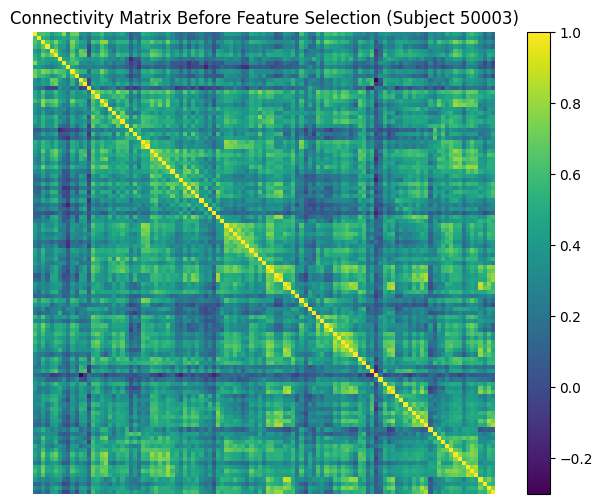

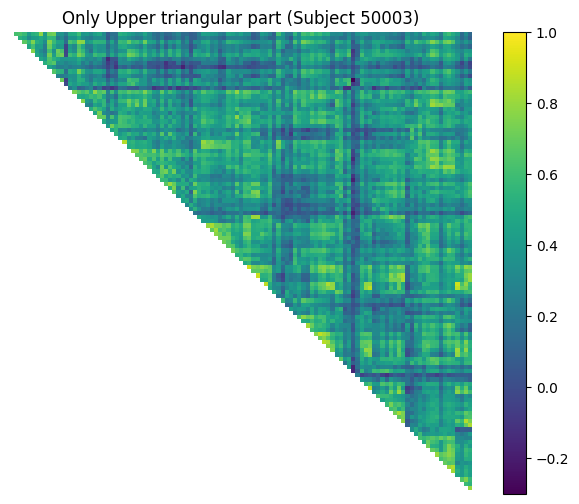

<ipython-input-47-d379d52ea935>:46: RuntimeWarning: invalid value encountered in arctanh
  norm_matrix = np.arctanh(connectivity_matrix_before)  # Fisher transformation pour normaliser


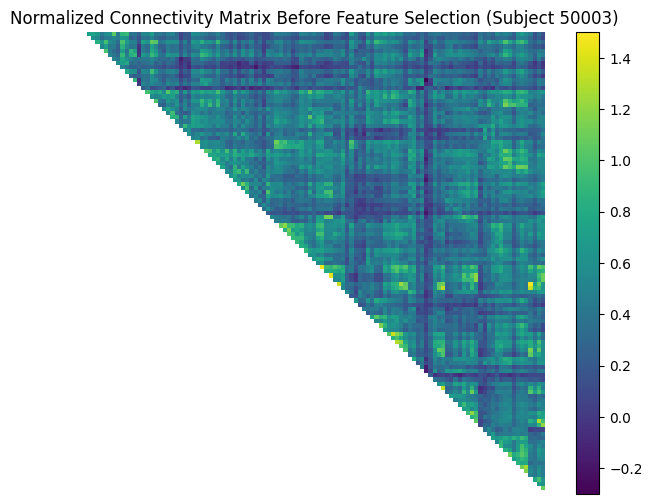

In [ ]:
# Get the connectivity matrix for one subject
def subject_connectivity(timeseries, subject, atlas_name, kind, save=False, save_path=None):
    """
    Get the connectivity matrix for one subject
    """
    print(f"Matrix {kind} for subject {subject}")

    # connectivity calcul from time series
    if kind in ['correlation', 'partial correlation', 'tangent']:
        conn_measure = connectome.ConnectivityMeasure(kind=kind)
        connectivity = conn_measure.fit_transform([timeseries])[0]
    else:
        raise ValueError(f"Kind of connectivity : {kind}")

    return connectivity

# Plot connectivity matrix as a heatmap
def plot_connectivity_matrix(matrix, title="Connectivity Matrix", vmin=-0.3, vmax=1, cmap='viridis'):
    """
    Plot connectivity matrix as a heatmap
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='none')
    plt.colorbar()
    plt.title(title)
    plt.axis('off')
    plt.show()

# Exemple for the first subject
subject_id = subject_IDs[0]
timeseries_subject = abide_data.rois_ho[0]

# 1. Get its connectivity matrix
connectivity_matrix_before = subject_connectivity(timeseries_subject, subject_id, atlas_name="ho", kind="correlation", save=False)

# 2. Plot the connectivity matrix before feature selection
plot_connectivity_matrix(connectivity_matrix_before, title=f"Connectivity Matrix Before Feature Selection (Subject {subject_id})")
lower_triangle = np.tril(connectivity_matrix_before, -1)
connectivity_matrix_before_tril = connectivity_matrix_before
connectivity_matrix_before_tril[lower_triangle != 0] = np.inf
np.fill_diagonal(connectivity_matrix_before_tril, np.inf)
plot_connectivity_matrix(connectivity_matrix_before_tril, title=f"Only Upper triangular part (Subject {subject_id})")

# 3. Extraction of tril upper part (vectorized_matrix)
norm_matrix = np.arctanh(connectivity_matrix_before)  # Fisher transformation to normalize
idx = np.triu_indices_from(connectivity_matrix_before, 1)
plot_connectivity_matrix(norm_matrix, vmax=1.5, title=f"Normalized Connectivity Matrix Before Feature Selection (Subject {subject_id})")
vectorized_matrix = norm_matrix[idx]


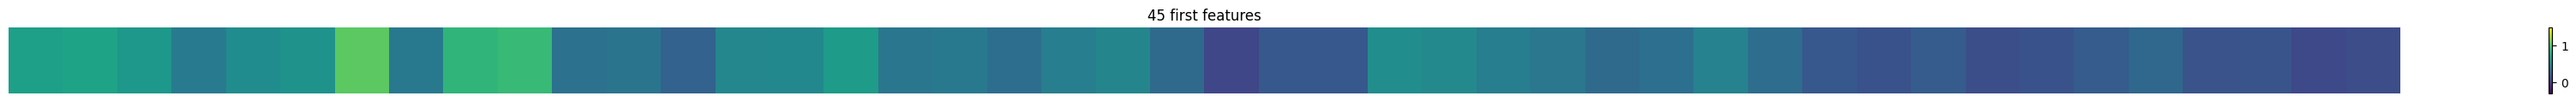

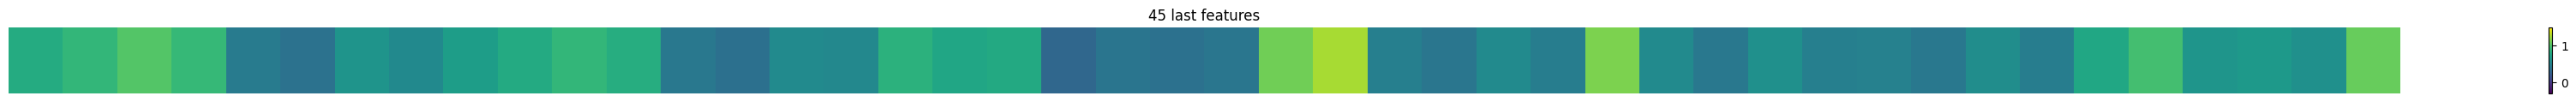

In [ ]:
# Extraction of part of the vectors
vectorized_matrix_extrait = vectorized_matrix[0:44]
plt.figure(figsize=(45, 1))
plt.imshow(vectorized_matrix_extrait.reshape(1, -1), vmin=-0.3, vmax=1.5, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("45 first features")
plt.axis('off')
plt.show()

vectorized_matrix_extrait = vectorized_matrix[len(vectorized_matrix)-44:len(vectorized_matrix)]
plt.figure(figsize=(45, 1))
plt.imshow(vectorized_matrix_extrait.reshape(1, -1), vmin=-0.3, vmax=1.5, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("45 last features")
plt.axis('off')
plt.show()

Fitting estimator with 6105 features.
Fitting estimator with 6005 features.
Fitting estimator with 5905 features.
Fitting estimator with 5805 features.
Fitting estimator with 5705 features.
Fitting estimator with 5605 features.
Fitting estimator with 5505 features.
Fitting estimator with 5405 features.
Fitting estimator with 5305 features.
Fitting estimator with 5205 features.
Fitting estimator with 5105 features.
Fitting estimator with 5005 features.
Fitting estimator with 4905 features.
Fitting estimator with 4805 features.
Fitting estimator with 4705 features.
Fitting estimator with 4605 features.
Fitting estimator with 4505 features.
Fitting estimator with 4405 features.
Fitting estimator with 4305 features.
Fitting estimator with 4205 features.
Fitting estimator with 4105 features.
Fitting estimator with 4005 features.
Fitting estimator with 3905 features.
Fitting estimator with 3805 features.
Fitting estimator with 3705 features.
Fitting estimator with 3605 features.
Fitting esti

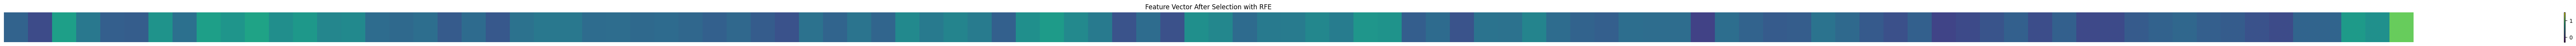

In [ ]:
# Cellule just for visual representation
def feature_selection_rfe(matrix, labels, train_ind, fnum):
    estimator = RidgeClassifier()
    selector = RFE(estimator, n_features_to_select=fnum, step=100, verbose=1)

    featureX = matrix[train_ind, :]
    featureY = labels[train_ind]

    selector = selector.fit(featureX, featureY.ravel())
    return selector

y = np.array([int(labels[subject_IDs[0]])])
train_ind = np.array([0])
fnum = 100

features = vectorized_matrix.reshape(1, -1)
rfe_selector = feature_selection_rfe(features, y, train_ind, fnum)
selected_indices = rfe_selector.support_

selected_vector = vectorized_matrix[selected_indices]

# feature vector after selection with RFE
plt.figure(figsize=(len(selected_vector), 1))
plt.imshow(selected_vector.reshape(1, -1),vmin=-0.3, vmax=1.5, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Feature Vector After Selection with RFE")
plt.axis('off')
plt.show()

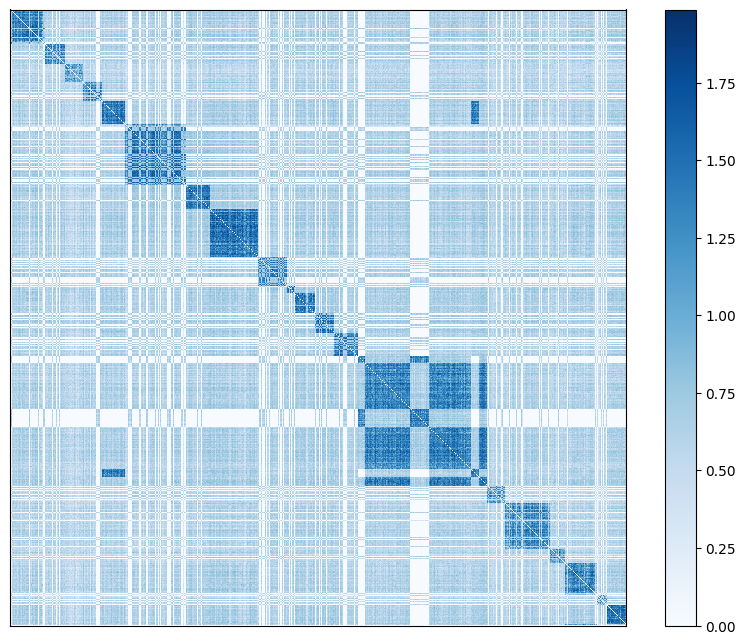

In [ ]:
# Plot adjacency matrix as a heatmap
def plot_adjacency_matrix(matrix, title=None, cmap="viridis"):
    """
    Plot adjacency matrix as a heatmap
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar()

    if title is not None:
      plt.title(title)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.show()

plot_adjacency_matrix(final_graph, cmap="Blues")

In [ ]:
site_ID = [subject['SITE_ID'] for subject in phenotype_data]

In [ ]:
np.unique(site_ID)

array(['CALTECH', 'CMU', 'KKI', 'LEUVEN_1', 'LEUVEN_2', 'MAX_MUN', 'NYU',
       'OHSU', 'OLIN', 'PITT', 'SBL', 'SDSU', 'STANFORD', 'TRINITY',
       'UCLA_1', 'UCLA_2', 'UM_1', 'UM_2', 'USM', 'YALE'], dtype='<U8')

In [ ]:
sex_ID = [subject['SEX'] for subject in phenotype_data]
np.unique(sex_ID)

array([1, 2])

In [ ]:
sex = get_subject_score(subject_IDs, 'SEX')
site_ids_for_subjects2 = [str(sites[subject]) for subject in subject_IDs]
sex_ids_for_subjects = [str(sex[subject]) for subject in subject_IDs]

In [ ]:
site_sex_ids_for_subjects = [str(sites[subject])+str(sex[subject]) for subject in subject_IDs]

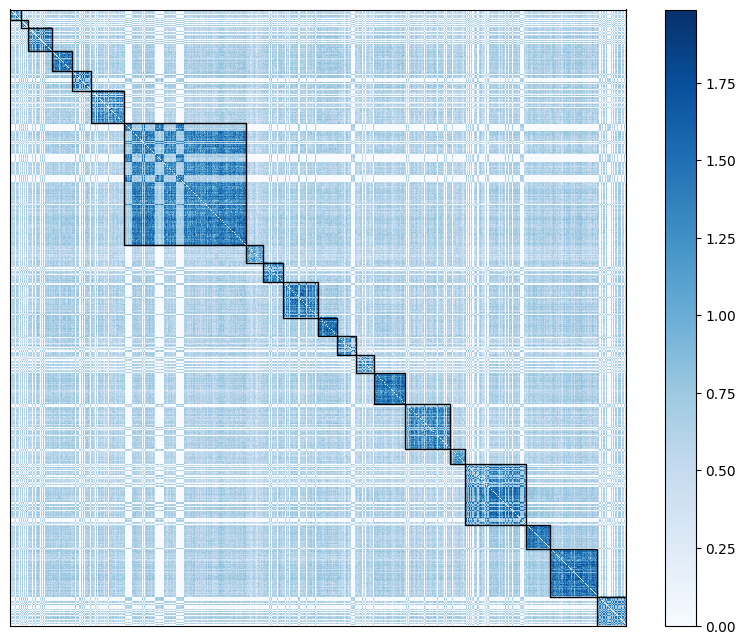

In [ ]:
# Sort adjacency matrix by site
def sort_adjacency_matrix_by_site(matrix, site_labels):
    """
    Sort adjacency matrix by `SITE_ID`
    """
    sorted_indices = np.argsort(site_labels)

    sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]
    sorted_labels = np.array(site_labels)[sorted_indices]

    return sorted_matrix, sorted_labels

# Plot adjacency matrix with borders for each site
def plot_adjacency_matrix_with_borders(matrix, site_labels, title=None, cmap="viridis"):
    """
    Plot adjacency matrix with borders for each site
    """
    plt.figure(figsize=(10, 8))
    cax = plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(cax)

    if title is not None:
        plt.title(title)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    unique_sites = np.unique(site_labels)
    for site in unique_sites:
        site_indices = np.where(site_labels == site)[0]
        plt.gca().add_patch(plt.Rectangle((site_indices[0] - 0.5, site_indices[0] - 0.5),
                                          len(site_indices), len(site_indices),
                                          fill=False, edgecolor='black', linewidth=1))

    plt.show()

sorted_graph, sorted_site_ids = sort_adjacency_matrix_by_site(final_graph, site_ids_for_subjects2)
plot_adjacency_matrix_with_borders(sorted_graph, sorted_site_ids, cmap="Blues")

<ipython-input-16-d24849809953>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_sites))  # Utiliser 'tab20' pour une palette de couleurs distinctes


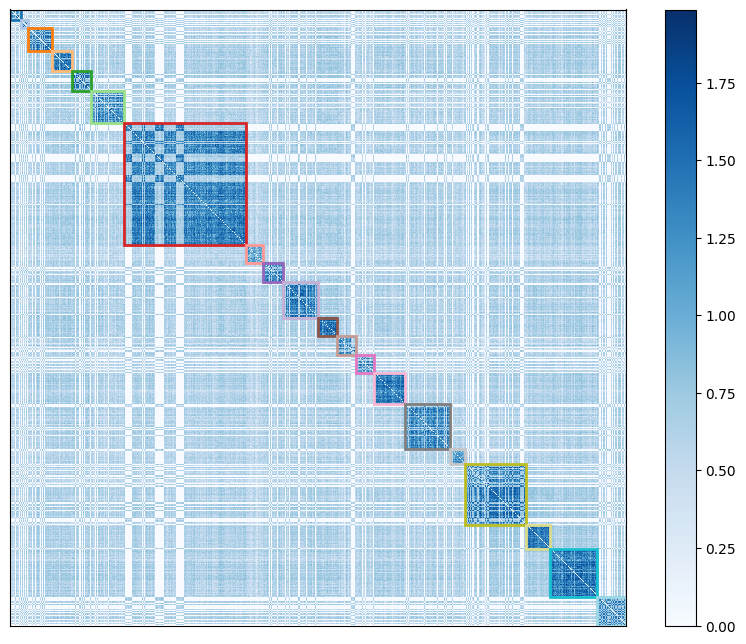

In [ ]:
# Sort adjacency matrix by site
def sort_adjacency_matrix_by_site(matrix, site_labels):
    """
    Sort adjacency matrix by `SITE_ID`
    """
    sorted_indices = np.argsort(site_labels)
    sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]
    sorted_labels = np.array(site_labels)[sorted_indices]

    return sorted_matrix, sorted_labels

# Plot adjacency matrix with colored borders for each site
def plot_adjacency_matrix_with_borders_and_legend(matrix, site_labels, title=None, cmap="viridis"):
    """
    Plot adjacency matrix with colored borders for each
    """
    plt.figure(figsize=(10, 8))
    cax = plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(cax)

    if title is not None:
        plt.title(title)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    unique_sites = np.unique(site_labels)
    colors = plt.cm.get_cmap('tab20', len(unique_sites))

    for i, site in enumerate(unique_sites):
        site_indices = np.where(site_labels == site)[0]

        plt.gca().add_patch(plt.Rectangle((site_indices[0] - 0.5, site_indices[0] - 0.5),
                                          len(site_indices), len(site_indices),
                                          fill=False, edgecolor=colors(i), linewidth=2))

    #handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_sites))]
    #plt.legend(handles, [f"Site {site}" for site in unique_sites], loc="upper right", title="Acquisition ites", frameon=False)

    plt.show()

sorted_graph, sorted_site_ids = sort_adjacency_matrix_by_site(final_graph, site_ids_for_subjects2)
plot_adjacency_matrix_with_borders_and_legend(sorted_graph, sorted_site_ids, cmap="Blues")

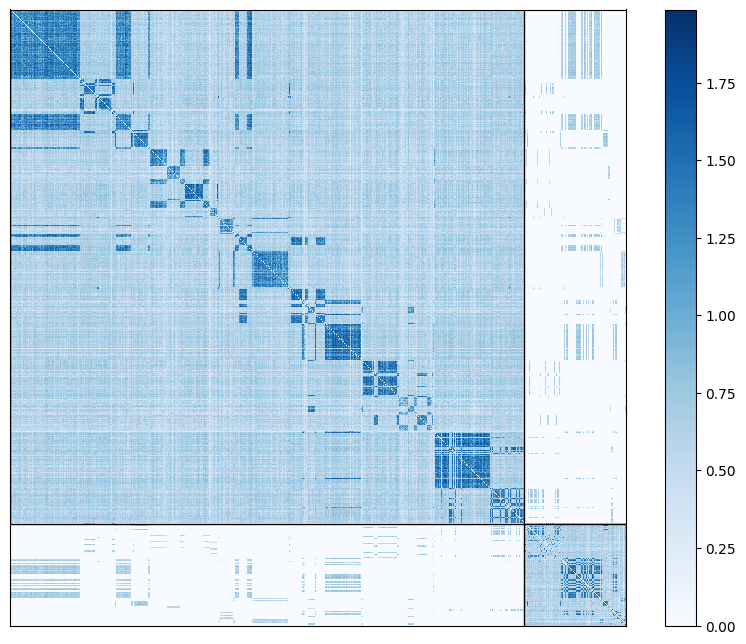

In [ ]:
# Sort adjacency matrix by sex
def sort_adjacency_matrix_by_sex(matrix, site_labels):
    """
    Sort adjacency matrix by `SEX`
    """
    sorted_indices = np.argsort(site_labels)
    sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]
    sorted_labels = np.array(site_labels)[sorted_indices]

    return sorted_matrix, sorted_labels

# Plot adjacency matrix with borders for each sex
def plot_adjacency_matrix_with_borders(matrix, site_labels, title=None, cmap="viridis"):
    """
    Plot adjacency matrix with borders for each SEX
    """
    plt.figure(figsize=(10, 8))
    cax = plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(cax)

    if title is not None:
        plt.title(title)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    unique_sites = np.unique(site_labels)
    for site in unique_sites:
        site_indices = np.where(site_labels == site)[0]
        plt.gca().add_patch(plt.Rectangle((site_indices[0] - 0.5, site_indices[0] - 0.5),
                                          len(site_indices), len(site_indices),
                                          fill=False, edgecolor='black', linewidth=1))

    plt.show()

sorted_graph, sorted_site_ids = sort_adjacency_matrix_by_sex(final_graph, sex_ids_for_subjects)
plot_adjacency_matrix_with_borders(sorted_graph, sorted_site_ids, cmap="Blues")

<ipython-input-35-eaca38ef58a1>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_sites))  # Utiliser 'tab20' pour une palette de couleurs distinctes


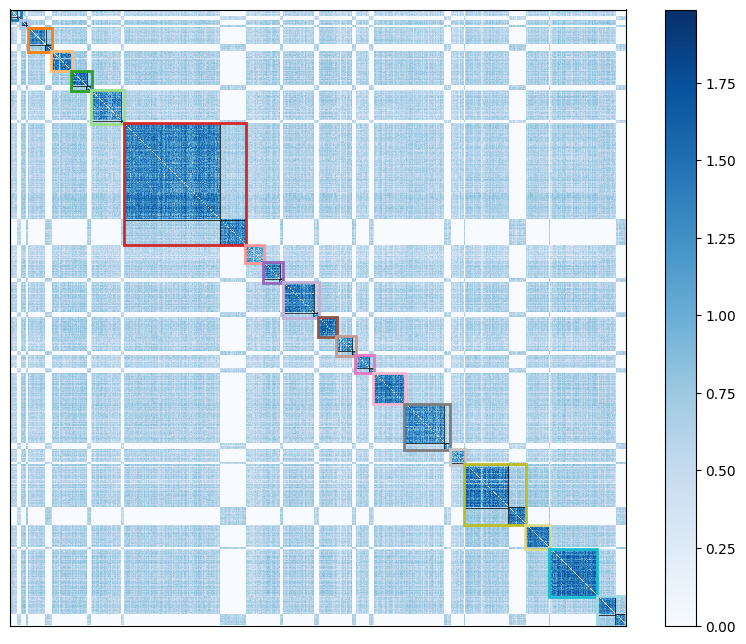

In [ ]:
# Sort adjacency matrix by site then sex
def sort_adjacency_matrix_by_site(matrix, site_sex_labels, site_labels):
    """
    Sort adjacency matrix by SITE_ID then SEX
    """
    sorted_indices = np.argsort(site_labels)
    sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]
    sorted_labels_site = np.array(site_labels)[sorted_indices]

    sorted_indices = np.argsort(site_sex_labels)
    sorted_matrix = matrix[sorted_indices, :][:, sorted_indices]
    sorted_labels_site_sex = np.array(site_sex_labels)[sorted_indices]

    return sorted_matrix, sorted_labels_site_sex, sorted_labels_site

# Plot adjacency matrix with borders for each site and sex
def plot_adjacency_matrix_with_borders_and_legend(matrix, site_sex_labels, site_labels, title=None, cmap="viridis"):
    """
    Plot adjacency matrix with borders for each SITE_ID and SEX
    """
    plt.figure(figsize=(10, 8))
    cax = plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(cax)

    if title is not None:
        plt.title(title)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    unique_sites = np.unique(site_labels)
    colors = plt.cm.get_cmap('tab20', len(unique_sites))

    unique_sites_sex = np.unique(site_sex_labels)
    for i, l in enumerate(unique_sites_sex):
        site_sex_indices = np.where(site_sex_labels == l)[0]
        plt.gca().add_patch(plt.Rectangle((site_sex_indices[0] - 0.5, site_sex_indices[0] - 0.5),
                                          len(site_sex_indices) + 0.5, len(site_sex_indices) + 0.5,
                                          fill=False, linewidth=0.5))

    for i, site in enumerate(unique_sites):
        site_indices = np.where(site_labels == site)[0]
        plt.gca().add_patch(plt.Rectangle((site_indices[0] - 1, site_indices[0] - 1),
                                          len(site_indices) + 1, len(site_indices) + 1,
                                          fill=False, edgecolor=colors(i), linewidth=2))


    #handles = [plt.Line2D([0], [0], color=colors(i), lw=4) for i in range(len(unique_sites))]
    #plt.legend(handles, [f"Site {site}" for site in unique_sites], loc="upper right", title="Acquisition ites", frameon=False)

    plt.show()

sorted_graph, sorted_site_sex_ids, sorted_site_ids = sort_adjacency_matrix_by_site(final_graph, site_sex_ids_for_subjects, site_ids_for_subjects2)
plot_adjacency_matrix_with_borders_and_legend(sorted_graph, sorted_site_sex_ids, sorted_site_ids, cmap="Blues")